<a href="https://colab.research.google.com/github/alcarvalhox/analise_de_oleo/blob/main/Analise_de_Oleo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Building

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split, \
GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, \
roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, auc, make_scorer, recall_score, \
accuracy_score, precision_score, f1_score, average_precision_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import qgrid
import numpy as np
from matplotlib import cm

In [ ]:
PATH = '/Users/afilguei/Desktop/Tuzzi/Projetos/VLI'
path = f'{PATH}/'

In [ ]:
DF = pd.read_excel(path + 'analise_orig1_2cl_p.xlsx', encoding = 'latin-1')

In [ ]:
DF

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,...,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_TBN,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,TARGET
0,13956,909040,2005-03-23,2.79,134.28,10.87,29.50,194.00,10.64,0.00,...,1,1,1,2.0,1.0,2,1,1,1,MONITORAR
1,2000292946,907352,2020-12-08,0.00,3.00,0.00,0.00,0.00,0.00,0.00,...,1,1,1,1.0,1.0,1,1,1,1,NORMAL
2,R-97349,907352,2020-11-03,2.09,3.08,0.09,0.48,0.24,0.42,0.05,...,1,1,1,1.0,1.0,1,1,1,1,NORMAL
3,2000296116,907352,2020-10-15,1.00,8.00,0.00,1.00,0.00,0.00,0.00,...,1,1,1,1.0,1.0,1,1,1,1,NORMAL
4,2000286917,907352,2020-09-18,4.00,5.00,0.00,0.00,1.00,0.00,0.00,...,1,1,1,1.0,1.0,1,1,1,1,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175955,177579,900952,2016-04-09,2.56,18.76,1.71,3.75,5.37,0.00,0.12,...,1,1,1,1.0,1.0,1,1,1,1,NORMAL
175956,88828,900751,2010-10-22,1.77,16.25,0.92,2.82,1.81,0.09,0.03,...,1,1,1,2.0,1.0,2,1,1,1,MONITORAR
175957,76289,900204,2010-04-03,2.94,7.72,0.13,3.13,3.49,0.00,0.01,...,1,1,1,2.0,1.0,2,1,1,1,MONITORAR
175958,76288,900051,2010-01-03,3.60,31.77,3.92,3.67,23.88,0.00,0.10,...,1,1,1,2.0,1.0,2,1,1,1,MONITORAR


In [ ]:
colunas = ['NU_ANLS_OLEO', 'LOCO_analise', 'DT_COLETA',
           'ALUMINIO', 'FERRO', 'CROMO', 'CHUMBO', 'COBRE', 'ESTANHO', 'PRATA', 'SILICIO', 'SODIO', 'DIESEL', 
           'VISCOSIDADE', 'AGUA', 'TBN', 'FULIGEM', 'OXIDACAO', 'SULFATACAO', 'TARGET']

month_interest = ['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', 
                  '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
                  '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', 
                  '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', 
                  '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', 
                  '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'
                  '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', 
                  '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
                  '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', 
                  '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', 
                  '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', 
                  '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']

DF['year_month'] = pd.to_datetime(DF['DT_COLETA']).map(lambda x: x.strftime('%Y-%m'))
DF = DF[DF['year_month'].isin(month_interest)]
df = DF[colunas]
df

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TARGET
0,13956,909040,2005-03-23,2.79,134.28,10.87,29.50,194.00,10.64,0.00,4.27,0.37,0,20.017046,0.000425,7.168057,0.333459,0.193007,0.284787,MONITORAR
1,2000292946,907352,2020-12-08,0.00,3.00,0.00,0.00,0.00,0.00,0.00,2.00,7.00,0,14.590000,0.001366,9.827000,0.150000,0.090000,0.140000,NORMAL
2,R-97349,907352,2020-11-03,2.09,3.08,0.09,0.48,0.24,0.42,0.05,2.55,1.87,0,14.730000,0.000425,7.168057,0.200000,0.034300,0.284787,NORMAL
3,2000296116,907352,2020-10-15,1.00,8.00,0.00,1.00,0.00,0.00,0.00,5.00,6.00,0,15.060000,0.001474,9.745000,0.090000,0.130000,0.180000,NORMAL
4,2000286917,907352,2020-09-18,4.00,5.00,0.00,0.00,1.00,0.00,0.00,3.00,5.00,0,14.890000,0.001158,9.814000,0.300000,0.100000,0.160000,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175955,177579,900952,2016-04-09,2.56,18.76,1.71,3.75,5.37,0.00,0.12,4.94,4.19,0,20.017046,0.000000,7.300000,0.300000,0.210000,0.280000,NORMAL
175956,88828,900751,2010-10-22,1.77,16.25,0.92,2.82,1.81,0.09,0.03,7.39,10.94,0,15.610000,0.000000,7.168057,0.290000,0.040000,0.060000,MONITORAR
175957,76289,900204,2010-04-03,2.94,7.72,0.13,3.13,3.49,0.00,0.01,5.57,5.38,0,20.017046,0.000425,7.168057,0.333459,0.193007,0.284787,MONITORAR
175958,76288,900051,2010-01-03,3.60,31.77,3.92,3.67,23.88,0.00,0.10,5.48,52.09,0,20.017046,0.000425,7.168057,0.333459,0.193007,0.284787,MONITORAR


(12.0, 0.0)

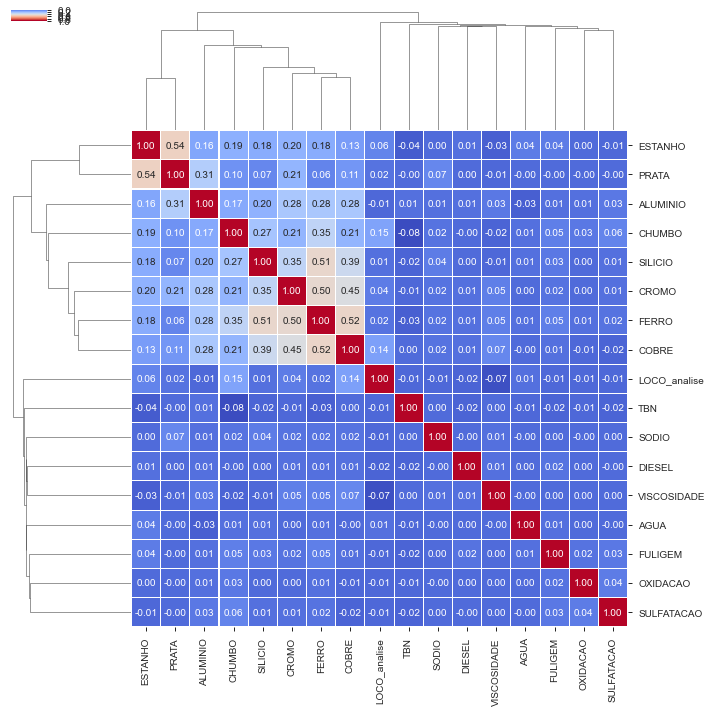

In [ ]:
correlations = df.corr()
sns.clustermap(round(correlations, 2), annot = True, cmap = "coolwarm", fmt = '.2f', linewidths = 0.05)
plt.ylim(12, 0)

In [ ]:
df['TARGET'].value_counts()

NORMAL       129216
MONITORAR     46744
Name: TARGET, dtype: int64

In [ ]:
y = df["TARGET"].replace({"NORMAL": 0, "MONITORAR": 1})
X = df.drop(labels = ["TARGET", "NU_ANLS_OLEO", "LOCO_analise", "DT_COLETA", "year_month"], axis = 1)

In [ ]:
print(f"Num Columns before VarianceThresholding : {X.shape[1]}")
var = VarianceThreshold(threshold = 0.001)
var.fit(X)
X_final = X[X.columns[var.get_support()]]
print(f"Num Columns after VarianceThresholding : {X_final.shape[1]}")

Num Columns before VarianceThresholding : 16
Num Columns after VarianceThresholding : 15


In [ ]:
def return_results(clf, X, y):
  cv = cross_validate(estimator = clf, X = X, y = y, scoring = ["f1", "precision", "recall"], cv = 5, n_jobs = -1, return_train_score = True, return_estimator = True)
  clf_fitted = cv["estimator"][0]
  
  try:
    impDf = dict(zip(X_final.columns, clf.feature_importances_))
    impDf = pd.Series(impDf).sort_values(ascending = False)
  except AttributeError:
    impDf = None   
  
  res = pd.DataFrame(cv)
  res = pd.concat([res.mean(), res.std()], axis = 1)
  res.columns = ["mean", "stdev"]
  return res, impDf, clf_fitted

In [ ]:
clf = DecisionTreeClassifier(max_depth = 4)
res, impDf, clf_fitted = return_results(clf, X_final, y)
print("Decision Tree Classifier Results")
print(res.iloc[2:,:])

Decision Tree Classifier Results
                     mean     stdev
test_f1          0.520563  0.037763
train_f1         0.525847  0.019404
test_precision   0.738432  0.063793
train_precision  0.741883  0.012328
test_recall      0.405016  0.048103
train_recall     0.407817  0.024797


[Text(613.8, 489.24, 'SODIO <= 24.955\nsamples = 100.0%\nvalue = [0.734, 0.266]'),
 Text(279.0, 380.52000000000004, 'FERRO <= 16.055\nsamples = 83.2%\nvalue = [0.805, 0.195]'),
 Text(111.6, 271.8, 'TBN <= 3.997\nsamples = 61.9%\nvalue = [0.88, 0.12]'),
 Text(55.8, 163.08000000000004, 'samples = 0.6%\nvalue = [0.0, 1.0]'),
 Text(167.39999999999998, 163.08000000000004, 'FULIGEM <= 1.005\nsamples = 61.3%\nvalue = [0.889, 0.111]'),
 Text(111.6, 54.360000000000014, 'samples = 60.9%\nvalue = [0.895, 0.105]'),
 Text(223.2, 54.360000000000014, 'samples = 0.4%\nvalue = [0.0, 1.0]'),
 Text(446.4, 271.8, 'FULIGEM <= 1.005\nsamples = 21.3%\nvalue = [0.587, 0.413]'),
 Text(390.59999999999997, 163.08000000000004, 'TBN <= 4.0\nsamples = 20.3%\nvalue = [0.616, 0.384]'),
 Text(334.79999999999995, 54.360000000000014, 'samples = 0.6%\nvalue = [0.0, 1.0]'),
 Text(446.4, 54.360000000000014, 'samples = 19.7%\nvalue = [0.636, 0.364]'),
 Text(502.2, 163.08000000000004, 'samples = 1.0%\nvalue = [0.0, 1.0]'),
 

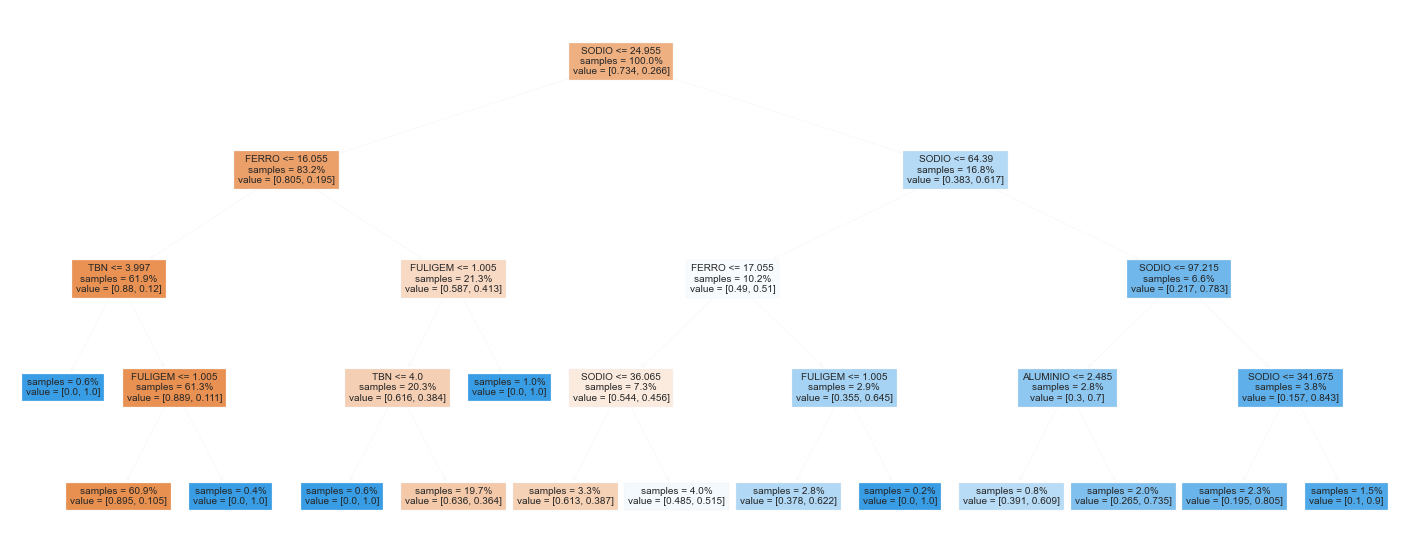

In [ ]:
plt.figure(figsize = (25, 10))
plot_tree(clf_fitted, feature_names = X_final.columns, impurity = False, proportion = True, filled = True, fontsize = 10)

In [ ]:
clf = RandomForestClassifier(max_depth = 4, n_estimators = 100)
res, impDf, clf_fitted = return_results(clf, X_final, y)
print("Random Forest Classifier Results")
print(res.iloc[2:,:])

Random Forest Classifier Results
                     mean     stdev
test_f1          0.448444  0.042365
train_f1         0.457299  0.020451
test_precision   0.803902  0.068749
train_precision  0.811205  0.005689
test_recall      0.313517  0.043812
train_recall     0.318683  0.019856


In [ ]:
# # Setting parameter sweep range for
# parameters = {'n_estimators': [100, 150, 200], 
#               'class_weight': ['balanced', None], 
#               'max_depth': [5, 10, 15], 
#               "min_samples_leaf": [5, 10, 15]}

# rfmod = RandomForestClassifier()
# search = GridSearchCV(rfmod, parameters, n_jobs = -1, verbose = 2, scoring = "f1")
# # search = RandomizedSearchCV(rfmod, param_distributions = parameters, cv = 4,  n_jobs= -1, verbose = 2, 
# #                             scoring = 'f1', n_iter = 10)
# search.fit(X_final, y)

# print(f'''Best Params: {search.best_params_} \n
#           Best F1-Score: {search.best_score_}''')

# best_params = search.best_params_

best_params = {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200} 

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X_final, y, test_size = 0.3)

In [ ]:
clf = RandomForestClassifier() 
clf.set_params(**best_params)
res, impDf, clf_fitted = return_results(clf, train_X, train_y)
print("Random Forest Classifier Results for the Regular Train-Test Splitting Method:")
print(res.iloc[2:,:])

Random Forest Classifier Results for the Regular Train-Test Splitting Method:
                     mean     stdev
test_f1          0.671336  0.003908
train_f1         0.734603  0.001514
test_precision   0.593476  0.003388
train_precision  0.650931  0.001812
test_recall      0.772723  0.005939
train_recall     0.842959  0.001116


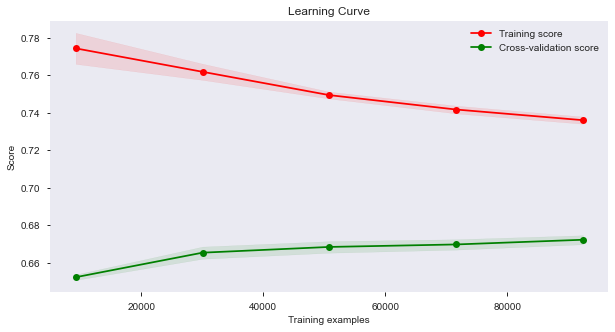

In [ ]:
skplt.estimators.plot_learning_curve(clf, train_X, train_y, cv = 4, n_jobs = -1, scoring = 'f1', figsize = (10, 5))

In [ ]:
## Model Fit
clf.fit(train_X, train_y)
preds = clf.predict_proba(test_X)

In [ ]:
print(classification_report(test_y, clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     38709
           1       0.60      0.78      0.68     14079

    accuracy                           0.80     52788
   macro avg       0.75      0.80      0.77     52788
weighted avg       0.83      0.80      0.81     52788



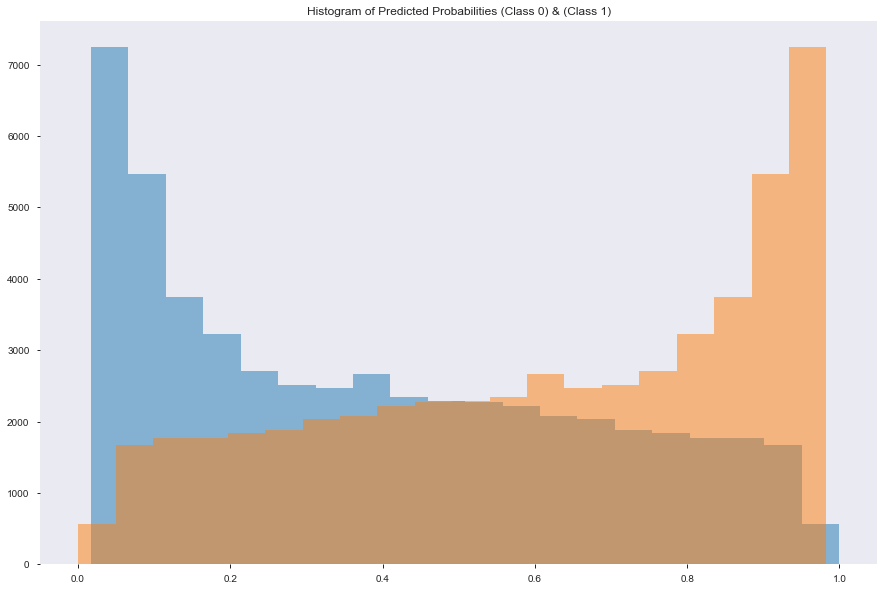

In [ ]:
plt.figure(figsize = (15, 10))
plt.hist(preds[:, 1], alpha = 0.5, bins = 20)
plt.hist(preds[:, 0], alpha = 0.5, bins = 20)
plt.title("Histogram of Predicted Probabilities (Class 0) & (Class 1)")
plt.grid()

Cutoff Point:  0.6


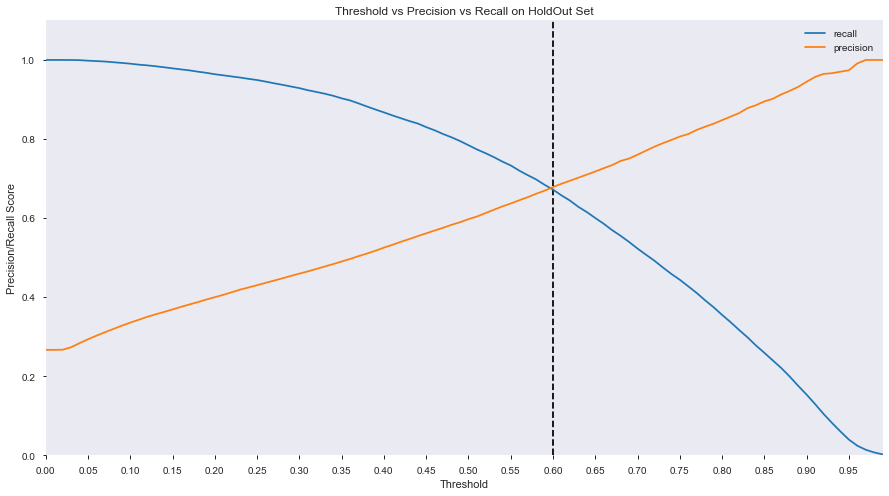

In [ ]:
final_df = pd.DataFrame()
for i in np.arange(0, 1, 0.01):
  final_df = final_df.append(pd.DataFrame({"cutoff": i, 
                                           "precision": precision_score(test_y, np.where(preds[:,1] > i, 1, 0)), 
                                           "recall": recall_score(test_y, np.where(preds[:,1] > i, 1, 0)),
                                           "f1": f1_score(test_y, np.where(preds[:,1] > i, 1, 0))}, index = [0]))

final_df.set_index("cutoff", inplace = True)
final_df['error'] = abs(final_df['precision'] - final_df['recall'])
cutoff_point = final_df[final_df['error'] == final_df['error'].min()].index[0]
print('Cutoff Point: ', cutoff_point)

ax = final_df.plot(y = ["recall", "precision"], figsize = (15, 8))
plt.vlines(cutoff_point, 0, 1.1, linestyles = 'dashed', colors = 'black')
ax.set_xticks(np.arange(0, 1, 0.05))
ax.set_xlim(0, 0.99)
ax.set_ylim(0, 1.1)
ax.set_title("Threshold vs Precision vs Recall on HoldOut Set")
ax.set_ylabel("Precision/Recall Score")
ax.set_xlabel("Threshold")
ax.grid()

Test Data:
0    73.329166
1    26.670834
Name: TARGET, dtype: float64
--------------------------------------------------
Predicted Data Before:
0    73.575434
1    26.424566
Name: 0, dtype: float64


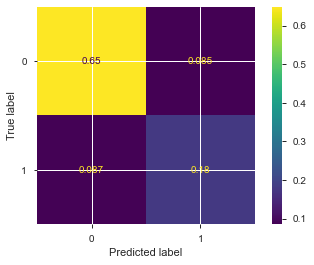

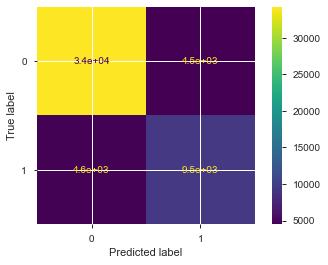

In [ ]:
preds = pd.DataFrame([1 if y >= cutoff_point else 0 for y in preds[:, 1]])

print("Test Data:")
print(test_y.value_counts(normalize = True)*100)
print("-"*50)
print("Predicted Data Before:")
print(preds[0].value_counts(normalize = True)*100)

cm = confusion_matrix(test_y, preds, normalize = 'all')
ConfusionMatrixDisplay(cm, display_labels = clf.classes_).plot()
cm = confusion_matrix(test_y, preds)
ConfusionMatrixDisplay(cm, display_labels = clf.classes_).plot()

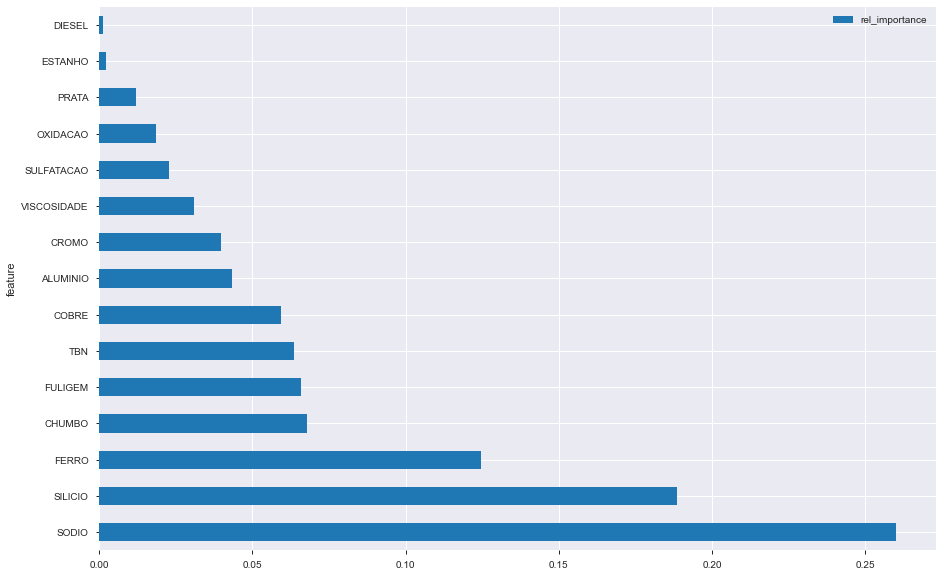

In [ ]:
impDf = pd.DataFrame({"feature": X_final.columns, "rel_importance": list(clf.feature_importances_)})
impDf.sort_values(by = "rel_importance", ascending = False).head(20).set_index("feature").plot(kind = "barh", 
                                                                                               figsize = (15, 10))

# Testing Different Models

------------------------- XGBM -------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.9s finished


              precision    recall  f1-score   support

           0       0.84      0.94      0.89     38709
           1       0.76      0.52      0.62     14079

    accuracy                           0.83     52788
   macro avg       0.80      0.73      0.75     52788
weighted avg       0.82      0.83      0.82     52788

------------------------- LGBM -------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.4s finished


              precision    recall  f1-score   support

           0       0.86      0.93      0.89     38709
           1       0.74      0.57      0.65     14079

    accuracy                           0.83     52788
   macro avg       0.80      0.75      0.77     52788
weighted avg       0.83      0.83      0.83     52788

------------------------- RFC -------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


              precision    recall  f1-score   support

           0       0.86      0.93      0.89     38709
           1       0.75      0.57      0.65     14079

    accuracy                           0.84     52788
   macro avg       0.80      0.75      0.77     52788
weighted avg       0.83      0.84      0.83     52788



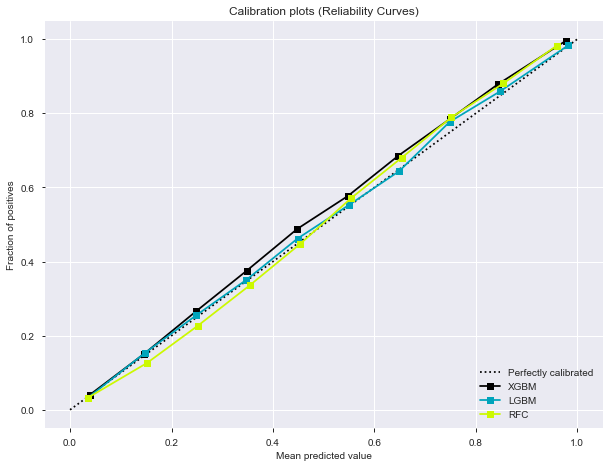

In [ ]:
models = [
          ('XGBM', XGBClassifier(objective = "binary:logistic", n_jobs = -1)),
          ('LGBM', LGBMClassifier(n_jobs = -1)),
          ('RFC', RandomForestClassifier(n_jobs = -1)),
         ]

dfs = []
results = []
names = []
probas_list = []
best_clf = []
scoring = ['balanced_accuracy', 'neg_log_loss', 'precision', 'recall', 'f1', 'roc_auc']

for name, model in models:
  print('-'*25, name, '-'*25)
  kfold = StratifiedKFold(n_splits = 5, shuffle = True)
  cv_results = cross_validate(model, train_X, train_y, cv = kfold, scoring = scoring, n_jobs = -1, verbose = 2)
  clf = model.fit(train_X, train_y)
  y_pred = clf.predict(test_X)
  y_proba = clf.predict_proba(test_X)
  probas_list.append(y_proba)
  print(classification_report(test_y, y_pred))
  best_clf.append((name, clf))
  results.append(cv_results)
  names.append(name)
  this_df = pd.DataFrame(cv_results)
  this_df['model'] = name
  dfs.append(this_df)

final = pd.concat(dfs, ignore_index = True)
skplt.metrics.plot_calibration_curve(test_y, probas_list, pd.DataFrame(models).iloc[:,0], figsize = (10, 7.5))

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n = 50, replace = True)
    bootstraps.append(bootstrap)
        
# fit time metrics
bootstrap_df = pd.concat(bootstraps, ignore_index = True)
results_long = pd.melt(bootstrap_df, id_vars = ['model'], var_name = 'metrics', value_name = 'values')
time_metrics = ['fit_time', 'score_time'] 

## PERFORMANCE METRICS
# get df without fit data
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] 
results_long_nofit = results_long_nofit.sort_values(by = 'values')

## TIME METRICS
# get df with fit data
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by = 'values')

# Building the agg table with the results and ranking by the F1-Score
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model']).agg([np.std, np.mean]).sort_values(by = [('test_f1', 'mean')], ascending = False)

fit_time            score_time           test_balanced_accuracy  \
             std       mean        std      mean                    std   
model                                                                     
RFC    15.458680  47.216723   0.753934  2.643693               0.003153   
LGBM    0.872906   4.239767   0.394667  1.780893               0.003837   
XGBM    5.749376  23.919895   0.060449  0.407168               0.002659   

                test_neg_log_loss           test_precision            \
           mean               std      mean            std      mean   
model                                                                  
RFC    0.744443          0.004566 -0.396668       0.002924  0.743826   
LGBM   0.743596          0.003585 -0.365634       0.005071  0.738206   
XGBM   0.725706          0.002577 -0.381081       0.004797  0.749227   

      test_recall             test_f1           test_roc_auc            
              std      mean       std      mean          std      mean  
model                                                                   
RFC      0.007952  0.558295  0.004545  0.637798     0.001629  0.878055  
LGBM     0.007612  0.558702  0.006022  0.636009     0.002678  0.880164  
XGBM     0.005075  0.513439  0.004464  0.609306     0.002501  0.870004

In [ ]:
# Initiate classifier instance
estimator = RandomForestClassifier()

# # Define parameter grid
# param_grid = {
#               'n_estimators': [100, 150, 200], 
#               'class_weight': ['balanced', None], 
#               'max_depth': [5, 10, 15], 
#               'min_samples_leaf': [5, 10, 15]
#              }

# # Initialize Search object
# kfold = StratifiedKFold(n_splits = 5, shuffle = True)
# scv = RandomizedSearchCV(estimator, param_distributions = param_grid, cv = kfold,  n_jobs= -1, verbose = 1, scoring = 'f1', n_iter = 20)
# # scv = GridSearchCV(estimator, param_grid = param_grid, cv = kfold,  n_jobs= -1, verbose = 1, scoring = 'f1', return_train_score = True)

# # Fit scv
# scv.fit(train_X, train_y)

# # Get best parameters and score
# best_score = scv.best_score_
# best_params = scv.best_params_
# print(best_params)
# print(best_score)

best_params = {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200}

# Update classifier parameters
RFC = estimator.set_params(**best_params)

In [ ]:
# Initiate classifier instance
estimator = XGBClassifier(objective = "binary:logistic", n_jobs = -1)

# # # Define parameter grid
# param_grid = {
#               "max_depth": [3, 4, 7, 10, 25],
#               "gamma": [0.5, 1, 5, 10, 25],
#               "min_child_weight": [1, 3, 5, 10, 25],
#               "reg_lambda": [5, 10, 50, 100, 300],
#               "scale_pos_weight": [1, 3, 5, 10, 25]
#               }

# # Initialize Search object
# kfold = StratifiedKFold(n_splits = 5, shuffle = True)
# scv = RandomizedSearchCV(estimator, param_distributions = param_grid, cv = kfold,  n_jobs= -1, verbose = 1, scoring = 'f1', n_iter = 20)
# # # scv = GridSearchCV(estimator, param_grid = param_grid, cv = kfold,  n_jobs= -1, verbose = 1, scoring = 'f1', return_train_score = True)
# # scv = HalvingGridSearchCV(estimator, param_grid, cv = kfold, verbose = 1, scoring = "f1", n_jobs = -1, min_resources = "exhaust", factor = 3)

# # Fit scv
# scv.fit(train_X, train_y)

# # Get best parameters and score
# best_score = scv.best_score_
# best_params = scv.best_params_
# print(best_params)
# print(best_score)

best_params = {'scale_pos_weight': 3, 'reg_lambda': 100, 'min_child_weight': 10, 'max_depth': 25, 'gamma': 1}

# Update classifier parameters
XGBMC = estimator.set_params(**best_params)

In [ ]:
# Initiate classifier instance
estimator = LGBMClassifier(n_jobs = -1)

# # Define parameter grid
# param_grid = {
#               'learning_rate': [0.001, 0.01, 0.1],
#               'n_estimators': [100, 500, 1000],
#               'num_leaves': [5, 25, 50], 
#               'boosting_type': ['gbdt', 'dart'], 
#               'max_bin': [100, 500], 
#               'max_depth': [5, 25, 50]
#              }

# # Initialize Search object
# kfold = StratifiedKFold(n_splits = 5, shuffle = True)
# scv = RandomizedSearchCV(estimator, param_distributions = param_grid, cv = kfold,  n_jobs= -1, verbose = 1, scoring = 'f1', n_iter = 20)
# # scv = GridSearchCV(estimator, param_grid = param_grid, cv = kfold,  n_jobs= -1, verbose = 1, scoring = 'f1', return_train_score = True)

# # Fit scv
# scv.fit(train_X, train_y)

# # Get best parameters and score
# best_score = scv.best_score_
# best_params = scv.best_params_
# print(best_params)
# print(best_score)

best_params = {'num_leaves': 50, 'n_estimators': 1000, 'max_depth': 50, 'max_bin': 500, 'learning_rate': 0.1, 'boosting_type': 'gbdt'}

# Update classifier parameters
LGBMC = estimator.set_params(**best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 28.4min finished


{'num_leaves': 50, 'n_estimators': 1000, 'max_depth': 50, 'max_bin': 500, 'learning_rate': 0.1, 'boosting_type': 'gbdt'}
0.639258825465484


XGBM_tuned
              precision    recall  f1-score   support

           0       0.92      0.80      0.85     38709
           1       0.59      0.80      0.68     14079

    accuracy                           0.80     52788
   macro avg       0.75      0.80      0.77     52788
weighted avg       0.83      0.80      0.81     52788

LGBM_tuned
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     38709
           1       0.74      0.58      0.65     14079

    accuracy                           0.83     52788
   macro avg       0.80      0.75      0.77     52788
weighted avg       0.83      0.83      0.83     52788

RFC_tuned
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     38709
           1       0.60      0.78      0.68     14079

    accuracy                           0.80     52788
   macro avg       0.75      0.80      0.77     52788
weighted avg       0.83      0.80      0.8

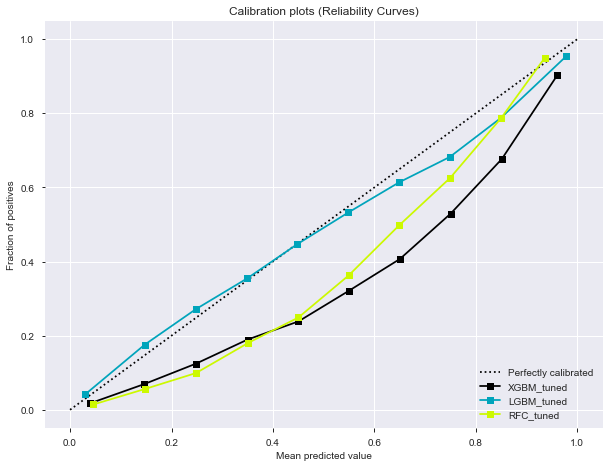

In [ ]:
models_tuned = [
                ('XGBM_tuned', XGBMC),
                ('LGBM_tuned', LGBMC),
                ('RFC_tuned', RFC)
               ]

dfs = []
results = []
names = []
probas_list = []
scoring = ['balanced_accuracy', 'neg_log_loss', 'precision', 'recall', 'f1', 'roc_auc']

for name, model in models_tuned:
  print(name)
  kfold = StratifiedKFold(n_splits = 5, shuffle = True)
  cv_results = cross_validate(model, train_X, train_y, cv = kfold, scoring = scoring, n_jobs = -1)
  clf = model.fit(train_X, train_y)  
  y_pred = clf.predict(test_X)
  y_proba = clf.predict_proba(test_X)
  probas_list.append(y_proba)
  print(classification_report(test_y, y_pred))
  best_clf.append((name, clf))
  results.append(cv_results)
  names.append(name)
  this_df = pd.DataFrame(cv_results)
  this_df['model'] = name
  dfs.append(this_df)

final_2 = pd.concat(dfs, ignore_index = True)
skplt.metrics.plot_calibration_curve(test_y, probas_list, pd.DataFrame(models_tuned).iloc[:,0], figsize = (10, 7.5))

In [ ]:
bootstraps = []
for model in list(set(final_2.model.values)):
    model_df = final_2.loc[final_2.model == model]
    bootstrap = model_df.sample(n = 50, replace = True)
    bootstraps.append(bootstrap)
        
# fit time metrics
bootstrap_df2 = pd.concat(bootstraps, ignore_index = True)
results_long = pd.melt(bootstrap_df2, id_vars = ['model'], var_name = 'metrics', value_name = 'values')
time_metrics = ['fit_time', 'score_time'] 

## PERFORMANCE METRICS
# get df without fit data
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] 
results_long_nofit = results_long_nofit.sort_values(by = 'values')

## TIME METRICS
# get df with fit data
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by = 'values')

# Building the agg table with the results
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df2.iloc[:,2:].groupby(['model']).agg([np.std, np.mean]).sort_values(by = [('test_f1', 'mean')], ascending = False)
bootstrap_df_full = pd.concat([bootstrap_df, bootstrap_df2], axis = 0)
bootstrap_df_full.iloc[:,2:].groupby(['model']).agg([np.std, np.mean]).sort_values(by = [('test_f1', 'mean')], ascending = False)

test_balanced_accuracy           test_neg_log_loss            \
                              std      mean               std      mean   
model                                                                     
XGBM_tuned               0.001997  0.794856          0.003091 -0.416498   
RFC_tuned                0.001954  0.791097          0.002269 -0.424597   
LGBM_tuned               0.001525  0.746470          0.001911 -0.375838   
RFC                      0.003153  0.744443          0.004566 -0.396668   
LGBM                     0.003837  0.743596          0.003585 -0.365634   
XGBM                     0.002659  0.725706          0.002577 -0.381081   

           test_precision           test_recall             test_f1            \
                      std      mean         std      mean       std      mean   
model                                                                           
XGBM_tuned       0.004044  0.587534    0.002211  0.789861  0.002920  0.673830   
RFC_tuned        0.003755  0.594201    0.004310  0.772659  0.002606  0.671767   
LGBM_tuned       0.002674  0.726333    0.002436  0.570522  0.002476  0.639067   
RFC              0.002924  0.743826    0.007952  0.558295  0.004545  0.637798   
LGBM             0.005071  0.738206    0.007612  0.558702  0.006022  0.636009   
XGBM             0.004797  0.749227    0.005075  0.513439  0.004464  0.609306   

           test_roc_auc            
                    std      mean  
model                              
XGBM_tuned     0.002055  0.882331  
RFC_tuned      0.001694  0.876832  
LGBM_tuned     0.001262  0.877098  
RFC            0.001629  0.878055  
LGBM           0.002678  0.880164  
XGBM           0.002501  0.870004

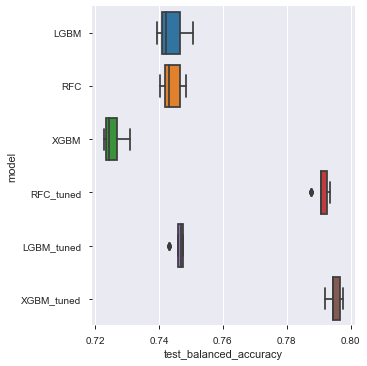

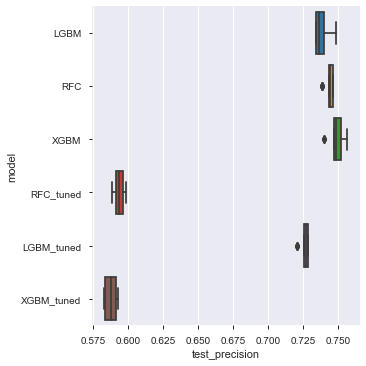

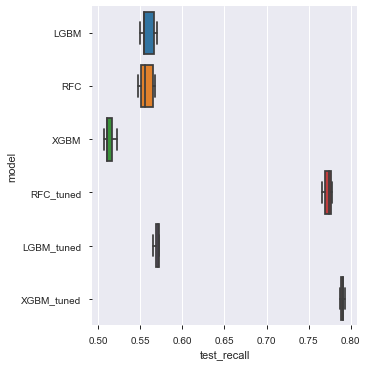

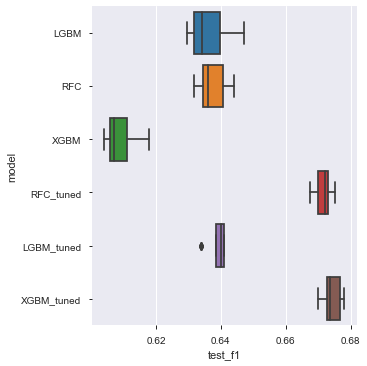

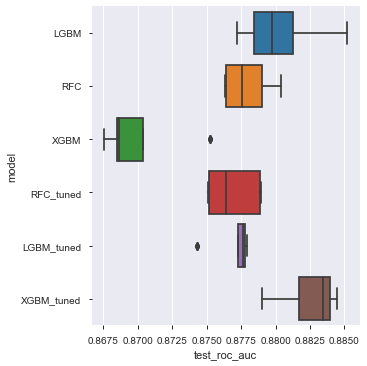

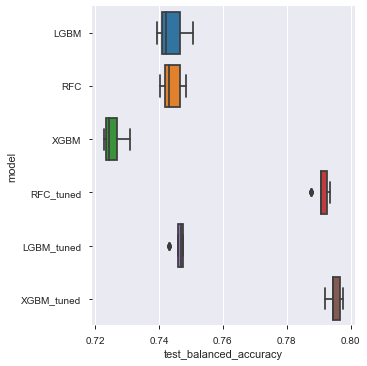

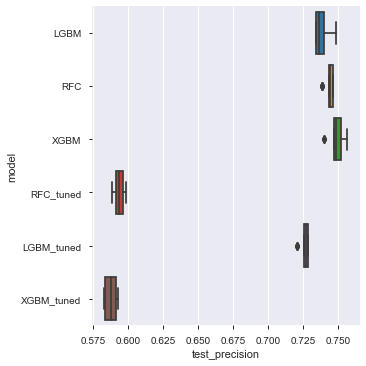

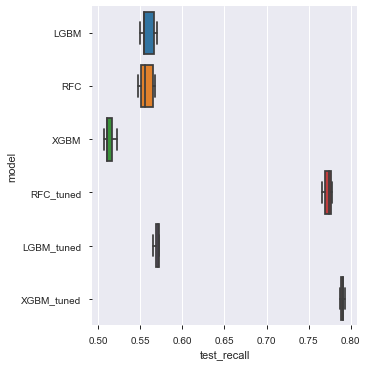

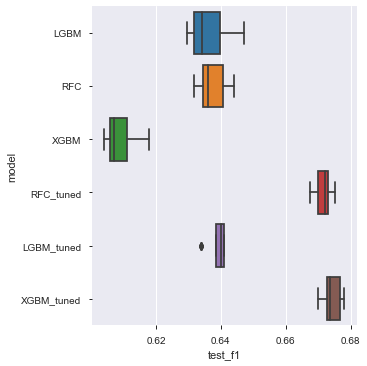

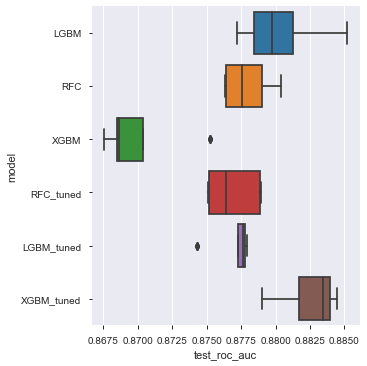

In [ ]:
num_feat = ['test_balanced_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']
            
for col in num_feat:
  g = sns.catplot(y = 'model', x = col, data = bootstrap_df_full, kind = "box", legend = True)
  display(g.fig)

Chosen Model:  XGBM_tuned XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=100, scale_pos_weight=3, seed=None,
              silent=None, subsample=1, verbosity=1)


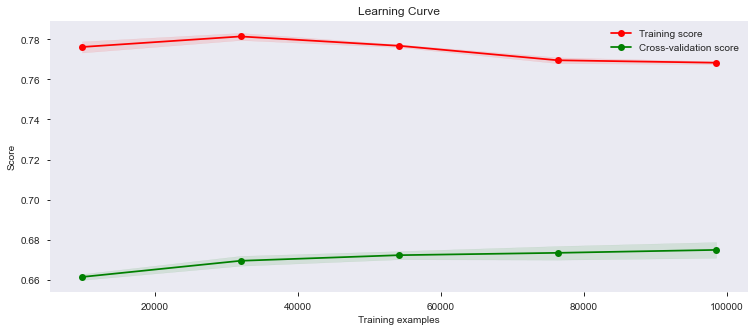

In [ ]:
chosen_model = bootstrap_df_full.groupby(['model'])['test_f1'].agg([np.mean]).nlargest(5, columns = ['mean'])

Models = []
for i in chosen_model.index:
  model = list(x for x in best_clf if i in x[0])
  Models.append(model)
  
Models = [y for x in Models for y in x]

name = Models[0][0]
clf = Models[0][1]#[1]
print('Chosen Model: ', name, clf)

y_pred = clf.predict(test_X)
y_proba = clf.predict_proba(test_X)
kfold = StratifiedKFold(n_splits = 5, shuffle = True)
predictors = list(test_X)
skplt.estimators.plot_learning_curve(clf, train_X, train_y, cv = kfold, n_jobs = -1, scoring = 'f1', figsize = (12.5, 5))

In [ ]:
res, impDf, clf_fitted = return_results(clf, train_X, train_y)
print("Fraud Classifier Results:")
print(res.iloc[2:,:])

Fraud Classifier Results:
                     mean     stdev
test_f1          0.675001  0.002863
train_f1         0.769331  0.001388
test_precision   0.588431  0.002677
train_precision  0.670797  0.001731
test_recall      0.791459  0.005484
train_recall     0.901799  0.000993


Cutoff Point:  0.64


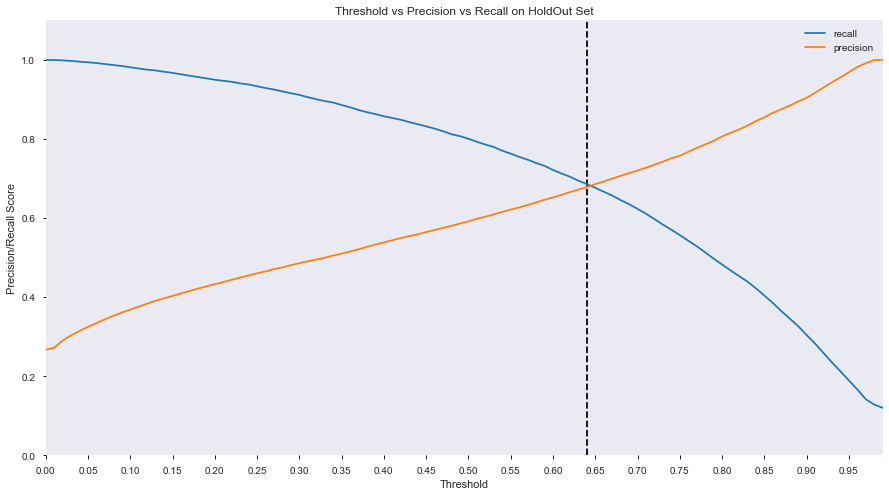

In [ ]:
# clf = LGBMClassifier(n_jobs = -1)
# clf = clf.fit(trainX, trainy)
preds = clf.predict_proba(test_X)

final_df = pd.DataFrame()
for i in np.arange(0, 1, 0.01):
  final_df = final_df.append(pd.DataFrame({"cutoff": i, 
                                           "precision": precision_score(test_y, np.where(preds[:, 1] > i, 1, 0)), 
                                           "recall": recall_score(test_y, np.where(preds[:, 1] > i, 1, 0)),
                                           "f1": f1_score(test_y, np.where(preds[:, 1] > i, 1, 0))}, index = [0]))

final_df.set_index("cutoff", inplace = True)
final_df['error'] = abs(final_df['precision'] - final_df['recall'])
cutoff_point = final_df[final_df['error'] == final_df['error'].min()].index[0]
print('Cutoff Point: ', cutoff_point)

ax = final_df.plot(y = ["recall", "precision"], figsize = (15, 8))
plt.vlines(cutoff_point, 0, 1.1, linestyles = 'dashed', colors = 'black')
ax.set_xticks(np.arange(0, 1, 0.05))
ax.set_xlim(0, 0.99)
ax.set_ylim(0, 1.1)
ax.set_title("Threshold vs Precision vs Recall on HoldOut Set")
ax.set_ylabel("Precision/Recall Score")
ax.set_xlabel("Threshold")
ax.grid()

# Evaluating with New Data

In [ ]:
v1_v2_dataset = pd.read_excel(path + 'bd_teste_2cl_pesos.xlsx', encoding = 'latin-1')
v1_v2_dataset['TARGET'] = v1_v2_dataset.apply(lambda row: 1 if (row['TX_ALUMINIO'] == 2) or 
                                                               (row['TX_FERRO'] == 2) or
                                                               (row['TX_CROMO'] == 2) or 
                                                               (row['TX_CHUMBO'] == 2) or
                                                               (row['TX_COBRE'] == 2) or 
                                                               (row['TX_ESTANHO'] == 2) or
                                                               (row['TX_PRATA'] == 2) or 
                                                               (row['TX_SILICIO'] == 2) or
                                                               (row['TX_SODIO'] == 2) or 
                                                               (row['LIM_DIESEL'] == 2) or
                                                               (row['LIM_VISCOSIDADE'] == 2) or 
                                                               (row['LIM_AGUA'] == 2) or
                                                               (row['LIM_FULIGEM'] == 2) or 
                                                               (row['LIM_OXIDACAO'] == 2) or
                                                               (row['LIM_SULFATACAO'] == 2) or 
                                                               (row['LIM_TBN'] == 2) else 0, axis = 1)
v1_v2_dataset

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,...,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,2100042797,907352,2021-03-17,3.0,8.0,0.0,2.0,0.0,1.0,0.0,...,1,1,1,1,1,1,1,1,1,0
1,2000528356,907352,2021-02-07,1.0,6.0,1.0,1.0,2.0,1.0,0.0,...,1,1,1,1,1,1,1,1,1,0
2,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0
3,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0
4,2000474993,907352,2020-12-19,2.0,5.0,0.0,0.0,1.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21458,2000291322,900952,2021-02-10,7.0,8.0,6.0,2.0,3.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0
21459,2000291181,900952,2021-01-27,6.0,7.0,6.0,0.0,3.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0
21460,2000291137,900952,2020-12-20,1.0,8.0,6.0,1.0,3.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0
21461,2000290106,900952,2020-10-16,1.0,8.0,6.0,2.0,2.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
v1_v2_dataset['TARGET'].value_counts()

0    16888
1     4575
Name: TARGET, dtype: int64

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     16888
           1       0.63      0.87      0.73      4575

    accuracy                           0.86     21463
   macro avg       0.79      0.86      0.82     21463
weighted avg       0.89      0.86      0.87     21463

Test Data:
0    78.684247
1    21.315753
Name: TARGET, dtype: float64
--------------------------------------------------
Predicted Data Before:
0    70.665797
1    29.334203
Name: 0, dtype: float64


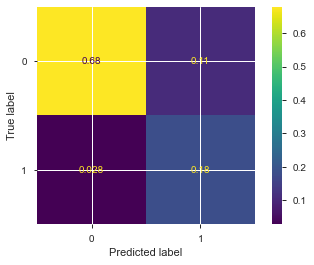

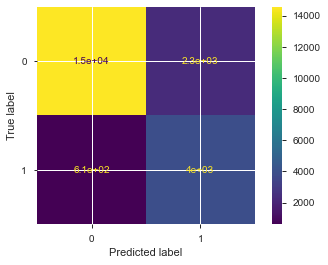

In [ ]:
testy_2 = v1_v2_dataset['TARGET']
testX_2 = v1_v2_dataset[test_X.columns]

preds = clf.predict_proba(testX_2)
preds = pd.DataFrame([1 if y >= 0.5 else 0 for y in preds[:, 1]]) # cutoff_point

print(classification_report(testy_2, preds))

print("Test Data:")
print(testy_2.value_counts(normalize = True)*100)
print("-"*50)
print("Predicted Data Before:")
print(preds[0].value_counts(normalize = True)*100)

cm = confusion_matrix(testy_2, preds, normalize = 'all')
ConfusionMatrixDisplay(cm, display_labels = clf.classes_).plot()
cm = confusion_matrix(testy_2, preds)
ConfusionMatrixDisplay(cm, display_labels = clf.classes_).plot()

In [ ]:
prediction_threshold = cutoff_point
preds = clf.predict_proba(testX_2)
predictions = pd.DataFrame({"LOCO_analise": v1_v2_dataset["LOCO_analise"], 
                            "NU_ANLS_OLEO": v1_v2_dataset["NU_ANLS_OLEO"], 
                            "pred_probability": np.round(preds[:, 1], 3), 
                            "loco_predicted_monitoring": np.where(preds[:, 1] > prediction_threshold, 1, 0)})
predictions_2 = pd.concat([v1_v2_dataset, predictions], axis = 1)
predictions_2

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,...,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET,user_identifer,transaction_id,v2_probability,v2_predicted_as_fraud
0,2100042797,907352,2021-03-17,3.0,8.0,0.0,2.0,0.0,1.0,0.0,...,1,1,1,1,1,0,907352,2100042797,0.023,0
1,2000528356,907352,2021-02-07,1.0,6.0,1.0,1.0,2.0,1.0,0.0,...,1,1,1,1,1,0,907352,2000528356,0.013,0
2,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,0,907352,2000477988,0.010,0
3,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,0,907352,2000477988,0.010,0
4,2000474993,907352,2020-12-19,2.0,5.0,0.0,0.0,1.0,0.0,0.0,...,1,1,1,1,1,0,907352,2000474993,0.008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21458,2000291322,900952,2021-02-10,7.0,8.0,6.0,2.0,3.0,0.0,0.0,...,1,1,1,1,1,0,900952,2000291322,0.088,0
21459,2000291181,900952,2021-01-27,6.0,7.0,6.0,0.0,3.0,0.0,0.0,...,1,1,1,1,1,0,900952,2000291181,0.066,0
21460,2000291137,900952,2020-12-20,1.0,8.0,6.0,1.0,3.0,0.0,0.0,...,1,1,1,1,1,0,900952,2000291137,0.068,0
21461,2000290106,900952,2020-10-16,1.0,8.0,6.0,2.0,2.0,0.0,0.0,...,1,1,1,1,1,0,900952,2000290106,0.078,0


In [ ]:
fp_2 = predictions_2[(predictions_2['v2_predicted_as_fraud'] == 1) & 
                     (predictions_2['TARGET'] == 0)].sort_values(by = ['LOCO_analise'])
fn_2 = predictions_2[(predictions_2['v2_predicted_as_fraud'] == 0) & 
                     (predictions_2['TARGET'] == 1)].sort_values(by = ['LOCO_analise'])
fn_2

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,...,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET,user_identifer,transaction_id,v2_probability,v2_predicted_as_fraud
21417,1900262549,903009,2019-08-15,0.000000,11.00000,0.000000,1.000000,3.000000,0.000000,0.000000,...,1,1,1,1,1,1,903009,1900262549,0.576,0
21416,1900253739,903009,2019-09-08,0.000000,11.00000,0.000000,3.000000,3.000000,0.000000,0.000000,...,1,1,1,1,1,1,903009,1900253739,0.613,0
21409,1900495348,903009,2020-04-09,2.037623,15.86741,0.902378,4.632315,3.716867,0.611221,0.022229,...,2,1,1,1,1,1,903009,1900495348,0.175,0
21358,2000339880,903042,2021-02-21,7.000000,36.00000,1.000000,1.000000,3.000000,0.000000,0.000000,...,1,1,1,1,1,1,903042,2000339880,0.193,0
21369,1900443003,903042,2020-02-09,8.000000,50.00000,1.000000,5.000000,4.000000,0.000000,0.000000,...,1,1,1,1,1,1,903042,1900443003,0.367,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2000283983,907345,2020-11-05,2.000000,21.00000,1.000000,5.000000,12.000000,1.000000,0.000000,...,1,1,1,1,1,1,907345,2000283983,0.081,0
213,2000477184,907345,2021-01-27,1.000000,4.00000,0.000000,3.000000,0.000000,0.000000,0.000000,...,1,1,1,1,1,1,907345,2000477184,0.507,0
108,1900051974,907350,2019-04-09,1.000000,22.00000,1.000000,14.000000,6.000000,2.000000,0.000000,...,1,1,1,1,1,1,907350,1900051974,0.538,0
71,1800317007,907351,2019-03-03,1.000000,8.00000,1.000000,1.000000,3.000000,0.000000,1.000000,...,1,1,1,1,1,1,907351,1800317007,0.028,0


# Model Drift

In [ ]:
DF = pd.read_excel(path + 'analise_orig1_2cl_p.xlsx', encoding = 'latin-1')
DF['year_month'] = pd.to_datetime(DF['DT_COLETA']).map(lambda x: x.strftime('%Y-%m'))
# DF['year_month'].unique()

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



 ========================= Training Period: from 2018-01 til 2018-06 =========================
Target Label size (Train): 0    3687
1    1664
Name: TARGET, dtype: int64
Target Label size (Evaluation): 0    574
1    261
Name: TARGET, dtype: int64
Num Columns before VarianceThresholding: 16
Num Columns after VarianceThresholding: 15
Train set size: 17.45 %
Test set size: 7.48 %
Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.715613  0.016478
train_f1         0.805168  0.002814
test_precision   0.677579  0.016046
train_precision  0.756244  0.006509
test_recall      0.759080  0.033652
train_recall     0.860964  0.008379
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1100
           1       0.68      0.77      0.72       506

    accuracy                           0.81      1606
   macro avg       0.78      0.80      0.79      1606
weighted avg       0.8

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cutoff Point:  0.5
------------------------- Evaluating Period: from 2018-07 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       574
           1       0.67      0.73      0.70       261

    accuracy                           0.80       835
   macro avg       0.77      0.78      0.78       835
weighted avg       0.81      0.80      0.81       835

Test Data:
0    68.742515
1    31.257485
Name: TARGET, dtype: float64
                                                  
Predicted Data Before:
0    65.868263
1    34.131737
Name: 0, dtype: float64

 ========================= Training Period: from 2018-01 til 2018-07 =========================
Target Label size (Train): 0    4261
1    1925
Name: TARGET, dtype: int64
Target Label size (Evaluation): 0    650
1    240
Name: TARGET, dtype: int64
Num Columns before VarianceThresholding: 16
Num Columns after VarianceThresholding: 15
Train set size: 20.17 %
Te

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cutoff Point:  0.5
------------------------- Evaluating Period: from 2018-08 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       650
           1       0.63      0.82      0.71       240

    accuracy                           0.82       890
   macro avg       0.78      0.82      0.79       890
weighted avg       0.84      0.82      0.83       890

Test Data:
0    73.033708
1    26.966292
Name: TARGET, dtype: float64
                                                  
Predicted Data Before:
0    64.719101
1    35.280899
Name: 0, dtype: float64

 ========================= Training Period: from 2018-01 til 2018-08 =========================
Target Label size (Train): 0    4911
1    2165
Name: TARGET, dtype: int64
Target Label size (Evaluation): 0    664
1    252
Name: TARGET, dtype: int64
Num Columns before VarianceThresholding: 16
Num Columns after VarianceThresholding: 15
Train set size: 23.08 %
Te

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cutoff Point:  0.5
------------------------- Evaluating Period: from 2018-09 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       664
           1       0.65      0.75      0.70       252

    accuracy                           0.82       916
   macro avg       0.78      0.80      0.79       916
weighted avg       0.83      0.82      0.83       916

Test Data:
0    72.489083
1    27.510917
Name: TARGET, dtype: float64
                                                  
Predicted Data Before:
0    68.449782
1    31.550218
Name: 0, dtype: float64

 ========================= Training Period: from 2018-01 til 2018-09 =========================
Target Label size (Train): 0    5575
1    2417
Name: TARGET, dtype: int64
Target Label size (Evaluation): 0    649
1    312
Name: TARGET, dtype: int64
Num Columns before VarianceThresholding: 16
Num Columns after VarianceThresholding: 15
Train set size: 26.06 %
Te

Cutoff Point:  0.54
------------------------- Evaluating Period: from 2019-02 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       545
           1       0.77      0.69      0.73       238

    accuracy                           0.84       783
   macro avg       0.82      0.80      0.81       783
weighted avg       0.84      0.84      0.84       783

Test Data:
0    69.604087
1    30.395913
Name: TARGET, dtype: float64
                                                  
Predicted Data Before:
0    72.796935
1    27.203065
Name: 0, dtype: float64

 ========================= Training Period: from 2018-01 til 2019-02 =========================
Target Label size (Train): 0    8551
1    3812
Name: TARGET, dtype: int64
Target Label size (Evaluation): 0    619
1    246
Name: TARGET, dtype: int64
Num Columns before VarianceThresholding: 16
Num Columns after VarianceThresholding: 15
Train set size: 40.32 %
T

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()



 ========================= Training Period: from 2018-01 til 2019-05 =========================
Target Label size (Train): 0    10348
1     4525
Name: TARGET, dtype: int64
Target Label size (Evaluation): 0    594
1    196
Name: TARGET, dtype: int64
Num Columns before VarianceThresholding: 16
Num Columns after VarianceThresholding: 15
Train set size: 48.51 %
Test set size: 20.79 %
Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.754329  0.006548
train_f1         0.812751  0.002627
test_precision   0.721422  0.011533
train_precision  0.775581  0.003760
test_recall      0.790937  0.021718
train_recall     0.853672  0.002464
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3137
           1       0.73      0.79      0.76      1325

    accuracy                           0.85      4462
   macro avg       0.82      0.83      0.82      4462
weighted avg       

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.746422  0.011116
train_f1         0.808982  0.003825
test_precision   0.721954  0.013878
train_precision  0.777543  0.006931
test_recall      0.773070  0.021937
train_recall     0.843102  0.001901
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3305
           1       0.72      0.77      0.75      1394

    accuracy                           0.84      4699
   macro avg       0.81      0.82      0.82      4699
weighted avg       0.85      0.84      0.85      4699

Cutoff Point:  0.53
------------------------- Evaluating Period: from 2019-07 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       617
           1       0.73      0.77      0.75       225

    accuracy                           0.86       842
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.750153  0.014352
train_f1         0.809851  0.003794
test_precision   0.722429  0.019104
train_precision  0.776001  0.003196
test_recall      0.780201  0.010465
train_recall     0.846844  0.008877
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3491
           1       0.71      0.78      0.75      1461

    accuracy                           0.84      4952
   macro avg       0.81      0.83      0.82      4952
weighted avg       0.85      0.84      0.84      4952

Cutoff Point:  0.54
------------------------- Evaluating Period: from 2019-08 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       598
           1       0.68      0.68      0.68       228

    accuracy                           0.82       826
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.745656  0.008076
train_f1         0.805100  0.002671
test_precision   0.708307  0.017434
train_precision  0.762237  0.003861
test_recall      0.788028  0.024500
train_recall     0.853087  0.003547
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3654
           1       0.71      0.79      0.74      1546

    accuracy                           0.84      5200
   macro avg       0.81      0.82      0.81      5200
weighted avg       0.85      0.84      0.84      5200

Cutoff Point:  0.55
------------------------- Evaluating Period: from 2019-09 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       613
           1       0.61      0.71      0.66       188

    accuracy                           0.83       801
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.743768  0.014784
train_f1         0.802617  0.001028
test_precision   0.706590  0.016822
train_precision  0.761412  0.004245
test_recall      0.785161  0.014627
train_recall     0.848578  0.004729
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3839
           1       0.70      0.78      0.74      1601

    accuracy                           0.84      5440
   macro avg       0.80      0.82      0.81      5440
weighted avg       0.84      0.84      0.84      5440

Cutoff Point:  0.56
------------------------- Evaluating Period: from 2019-10 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       621
           1       0.71      0.71      0.71       218

    accuracy                           0.85       839
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.746387  0.007382
train_f1         0.800125  0.001827
test_precision   0.712835  0.014115
train_precision  0.761211  0.003376
test_recall      0.783526  0.011271
train_recall     0.843243  0.002115
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3997
           1       0.71      0.77      0.74      1695

    accuracy                           0.84      5692
   macro avg       0.80      0.82      0.81      5692
weighted avg       0.84      0.84      0.84      5692

Cutoff Point:  0.54
------------------------- Evaluating Period: from 2019-11 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       609
           1       0.66      0.70      0.68       237

    accuracy                           0.81       846
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.742056  0.008136
train_f1         0.796935  0.002613
test_precision   0.705629  0.009046
train_precision  0.756586  0.005457
test_recall      0.782590  0.013420
train_recall     0.841859  0.002293
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4195
           1       0.69      0.78      0.73      1751

    accuracy                           0.83      5946
   macro avg       0.80      0.82      0.81      5946
weighted avg       0.84      0.83      0.84      5946

Cutoff Point:  0.55
------------------------- Evaluating Period: from 2019-12 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       566
           1       0.70      0.76      0.73       248

    accuracy                           0.83       814
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.738523  0.002648
train_f1         0.798267  0.002113
test_precision   0.698455  0.004648
train_precision  0.752567  0.004734
test_recall      0.783576  0.009566
train_recall     0.849905  0.003076
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4339
           1       0.70      0.77      0.74      1851

    accuracy                           0.83      6190
   macro avg       0.80      0.82      0.81      6190
weighted avg       0.84      0.83      0.84      6190

Cutoff Point:  0.54
------------------------- Evaluating Period: from 2020-01 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       554
           1       0.68      0.66      0.67       155

    accuracy                           0.86       709
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.735790  0.012649
train_f1         0.793132  0.002337
test_precision   0.695727  0.016492
train_precision  0.749570  0.005500
test_recall      0.780834  0.008723
train_recall     0.842102  0.002129
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4544
           1       0.70      0.78      0.74      1858

    accuracy                           0.84      6402
   macro avg       0.80      0.82      0.81      6402
weighted avg       0.85      0.84      0.84      6402

Cutoff Point:  0.55
------------------------- Evaluating Period: from 2020-02 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       472
           1       0.76      0.71      0.73       191

    accuracy                           0.85       663
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.737227  0.007052
train_f1         0.791993  0.001610
test_precision   0.698034  0.015772
train_precision  0.745911  0.003533
test_recall      0.781538  0.014557
train_recall     0.844163  0.002986
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      4653
           1       0.69      0.80      0.74      1948

    accuracy                           0.83      6601
   macro avg       0.80      0.82      0.81      6601
weighted avg       0.84      0.83      0.84      6601

Cutoff Point:  0.5700000000000001
------------------------- Evaluating Period: from 2020-03 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       551
           1       0.75      0.76      0.75       158

    accuracy                           0.89       709

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()



 ========================= Training Period: from 2018-01 til 2020-03 =========================
Target Label size (Train): 0    16143
1     6569
Name: TARGET, dtype: int64
Target Label size (Evaluation): 0    598
1    155
Name: TARGET, dtype: int64
Num Columns before VarianceThresholding: 16
Num Columns after VarianceThresholding: 15
Train set size: 74.07 %
Test set size: 31.75 %
Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.737448  0.008842
train_f1         0.795722  0.003661
test_precision   0.699662  0.007654
train_precision  0.754555  0.003735
test_recall      0.779704  0.015865
train_recall     0.841663  0.006066
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4857
           1       0.70      0.77      0.74      1957

    accuracy                           0.84      6814
   macro avg       0.80      0.82      0.81      6814
weighted avg       

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.737674  0.008571
train_f1         0.793676  0.000564
test_precision   0.695230  0.005152
train_precision  0.746330  0.002727
test_recall      0.785700  0.014150
train_recall     0.847458  0.003630
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4959
           1       0.70      0.77      0.73      2081

    accuracy                           0.84      7040
   macro avg       0.80      0.82      0.81      7040
weighted avg       0.84      0.84      0.84      7040

Cutoff Point:  0.54
------------------------- Evaluating Period: from 2020-05 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       591
           1       0.61      0.67      0.64       169

    accuracy                           0.83       760
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.730921  0.004243
train_f1         0.791319  0.001912
test_precision   0.690597  0.008909
train_precision  0.746807  0.003159
test_recall      0.776333  0.003832
train_recall     0.841491  0.003580
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5217
           1       0.70      0.78      0.74      2051

    accuracy                           0.84      7268
   macro avg       0.81      0.82      0.81      7268
weighted avg       0.85      0.84      0.85      7268

Cutoff Point:  0.54
------------------------- Evaluating Period: from 2020-06 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       571
           1       0.70      0.69      0.70       185

    accuracy                           0.85       756
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.728568  0.018876
train_f1         0.789398  0.002531
test_precision   0.687094  0.018965
train_precision  0.742306  0.003384
test_recall      0.775381  0.018832
train_recall     0.842879  0.002952
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5332
           1       0.71      0.78      0.74      2163

    accuracy                           0.84      7495
   macro avg       0.81      0.83      0.82      7495
weighted avg       0.85      0.84      0.85      7495

Cutoff Point:  0.54
------------------------- Evaluating Period: from 2020-07 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       525
           1       0.69      0.81      0.74       157

    accuracy                           0.87       682
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.733606  0.007800
train_f1         0.791221  0.004087
test_precision   0.693721  0.006784
train_precision  0.749438  0.005625
test_recall      0.778533  0.015980
train_recall     0.837960  0.004319
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5580
           1       0.69      0.78      0.73      2119

    accuracy                           0.84      7699
   macro avg       0.80      0.82      0.81      7699
weighted avg       0.85      0.84      0.85      7699

Cutoff Point:  0.55
------------------------- Evaluating Period: from 2020-08 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       680
           1       0.73      0.83      0.78       158

    accuracy                           0.91       838
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.732015  0.006281
train_f1         0.787216  0.002844
test_precision   0.689326  0.005695
train_precision  0.741060  0.004172
test_recall      0.780621  0.017933
train_recall     0.839528  0.004485
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      5791
           1       0.69      0.79      0.74      2160

    accuracy                           0.85      7951
   macro avg       0.80      0.83      0.81      7951
weighted avg       0.85      0.85      0.85      7951

Cutoff Point:  0.56
------------------------- Evaluating Period: from 2020-09 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       595
           1       0.73      0.77      0.75       168

    accuracy                           0.89       763
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.732684  0.010243
train_f1         0.788692  0.003316
test_precision   0.686349  0.010712
train_precision  0.738704  0.004533
test_recall      0.786034  0.019842
train_recall     0.845949  0.003313
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      5877
           1       0.68      0.78      0.73      2303

    accuracy                           0.84      8180
   macro avg       0.80      0.82      0.81      8180
weighted avg       0.85      0.84      0.84      8180

Cutoff Point:  0.56
------------------------- Evaluating Period: from 2020-10 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       574
           1       0.73      0.75      0.74       169

    accuracy                           0.88       743
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.730087  0.010004
train_f1         0.783991  0.001656
test_precision   0.685598  0.006142
train_precision  0.734769  0.005170
test_recall      0.780792  0.015186
train_recall     0.840331  0.004155
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      6056
           1       0.70      0.79      0.74      2347

    accuracy                           0.84      8403
   macro avg       0.80      0.83      0.81      8403
weighted avg       0.85      0.84      0.85      8403

Cutoff Point:  0.56
------------------------- Evaluating Period: from 2020-11 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       201
           1       0.72      0.76      0.74        54

    accuracy                           0.89       255
   macro avg 

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()



Train set size: 92.17 %
Test set size: 39.51 %
Random Forest Classifier Results for the Customer-Based Splitting Method:
                     mean     stdev
test_f1          0.727972  0.004304
train_f1         0.787350  0.001325
test_precision   0.684771  0.014200
train_precision  0.739778  0.002539
test_recall      0.777452  0.014102
train_recall     0.841476  0.003393
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      6150
           1       0.70      0.79      0.74      2329

    accuracy                           0.85      8479
   macro avg       0.81      0.83      0.82      8479
weighted avg       0.86      0.85      0.85      8479

Cutoff Point:  0.55
------------------------- Evaluating Period: from 2020-12 til 2020-12 -------------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       253
           1       0.62      0.74      0.68        58

    accuracy       

C:\Users\afilguei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


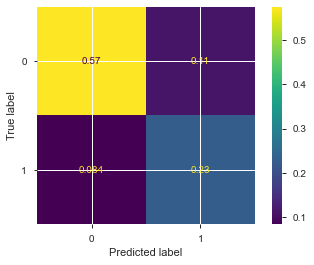

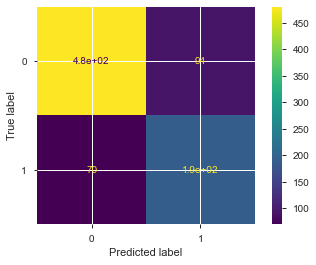

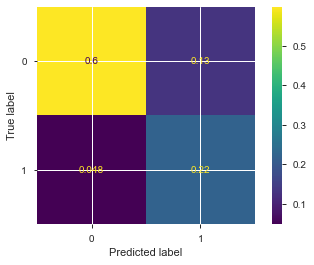

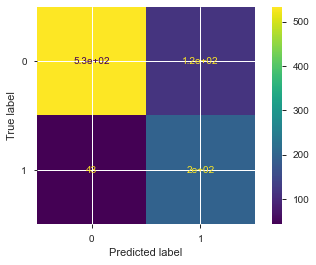

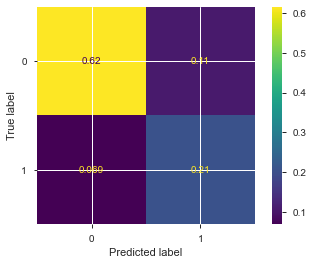

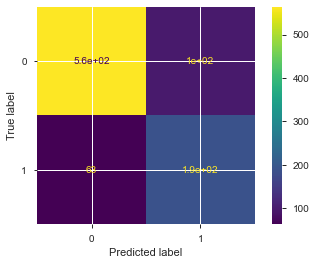

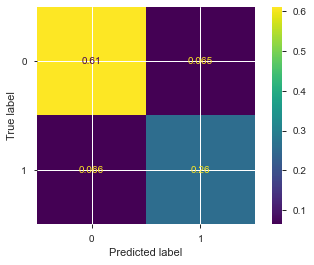

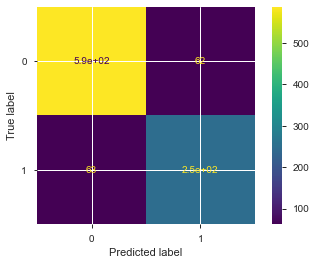

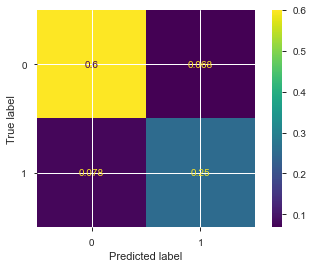

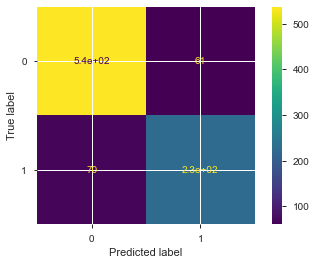

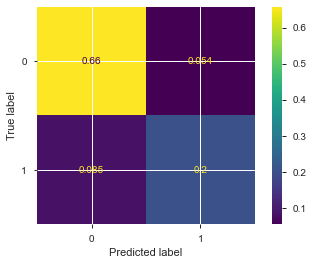

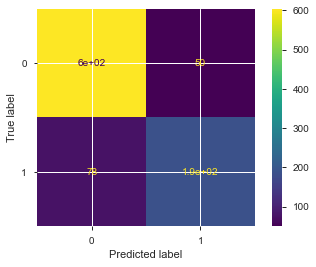

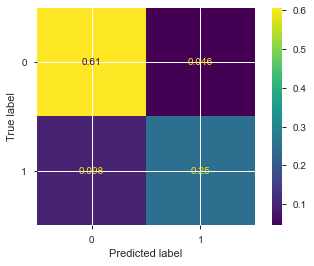

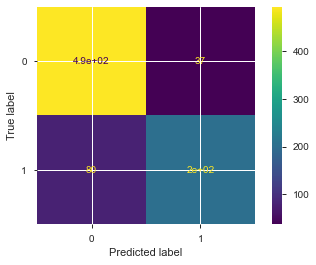

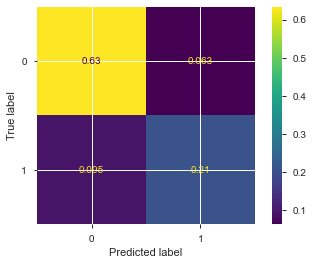

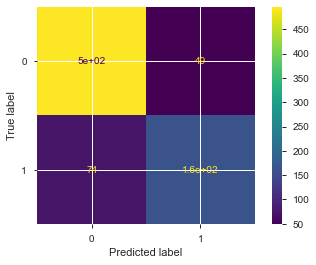

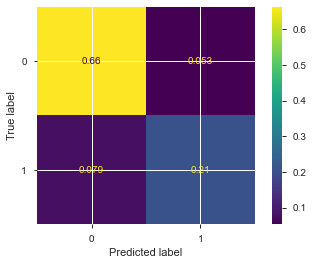

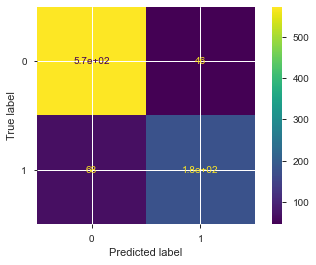

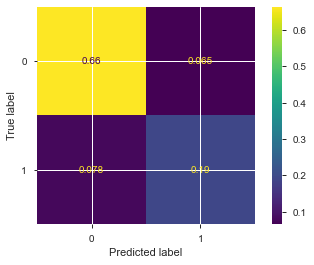

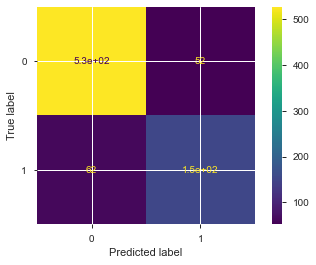

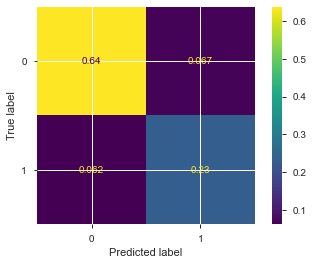

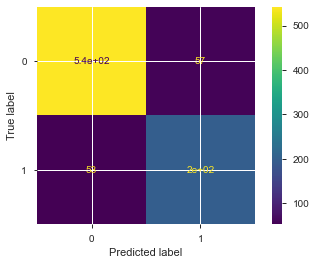

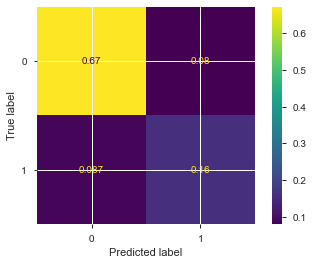

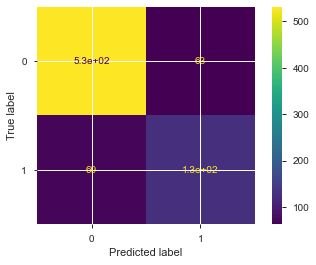

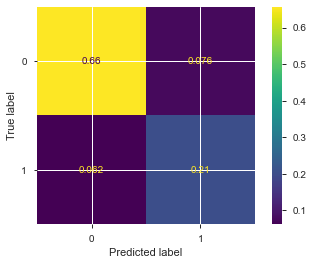

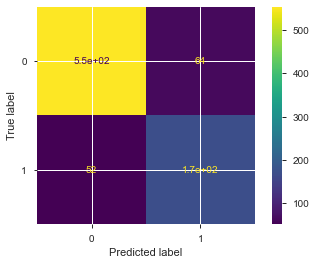

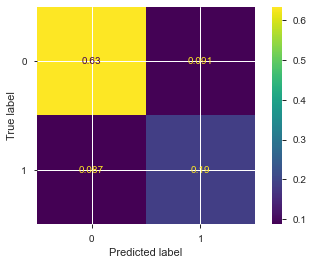

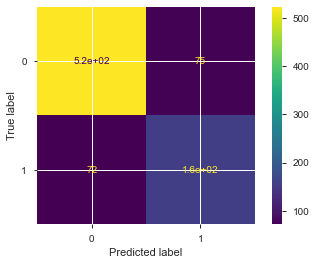

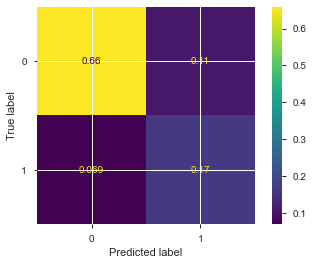

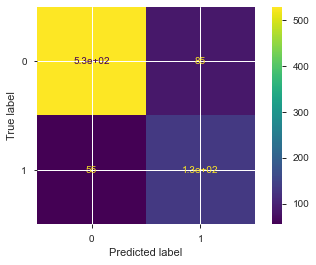

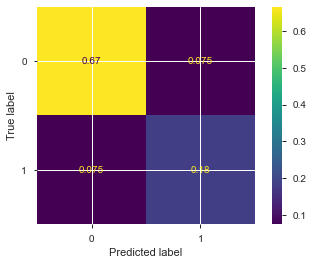

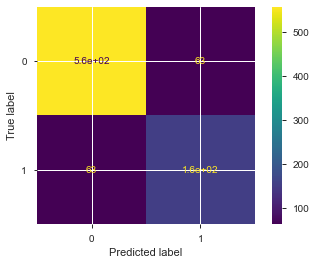

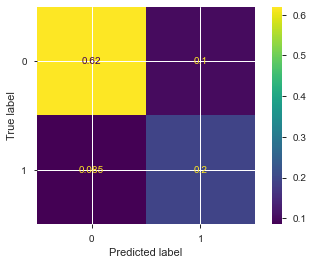

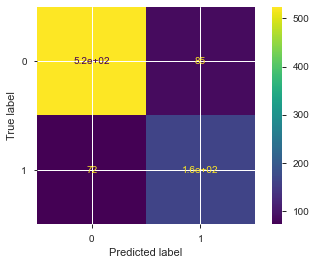

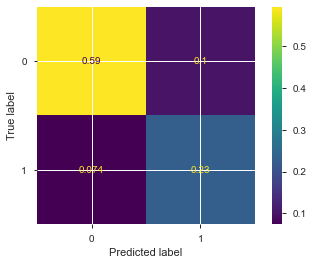

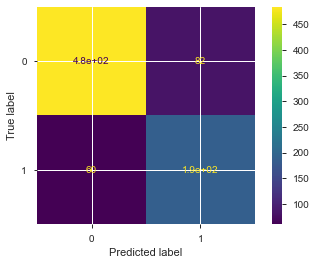

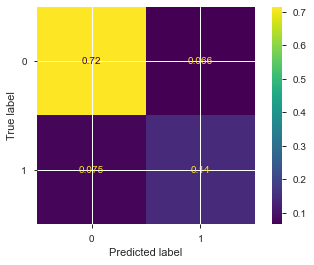

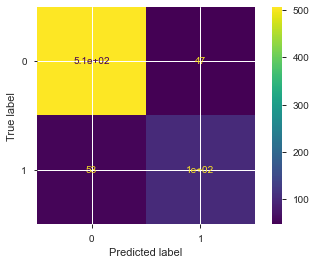

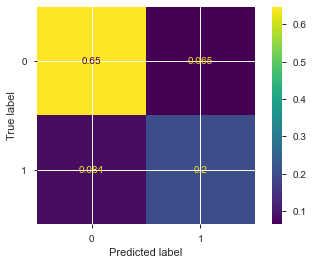

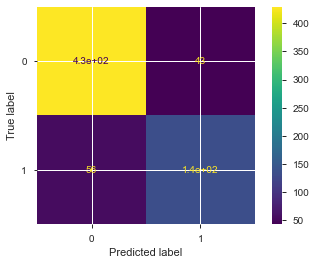

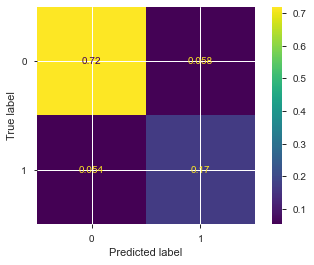

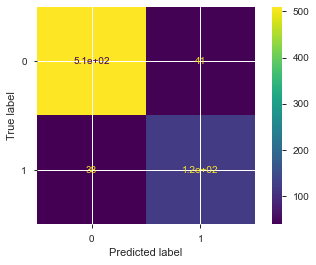

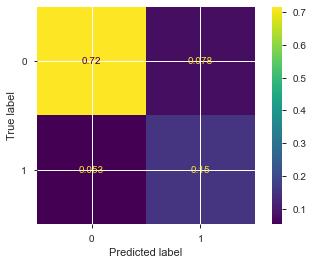

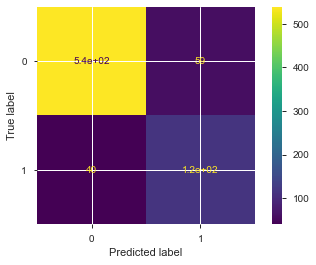

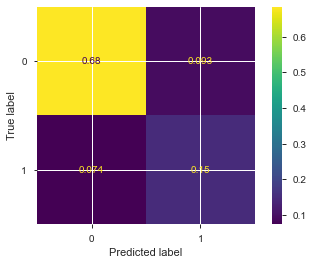

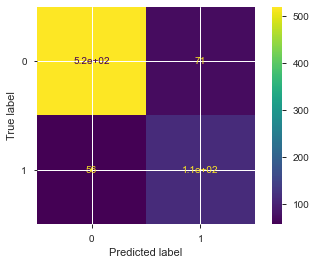

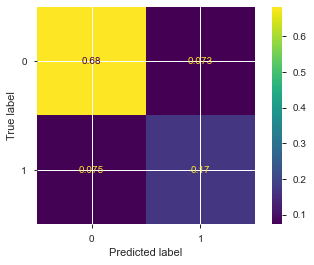

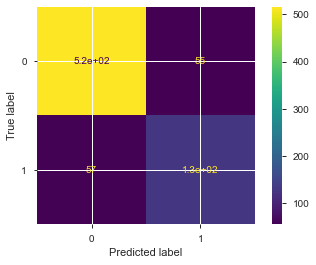

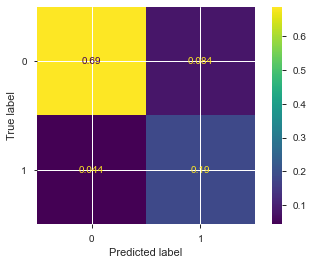

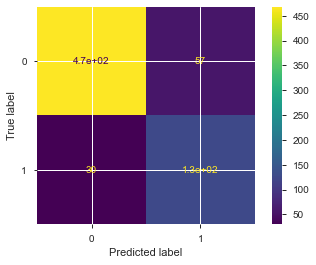

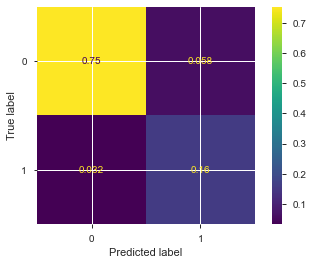

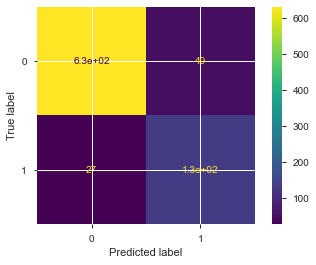

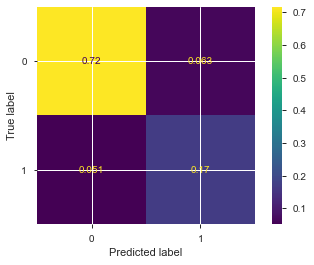

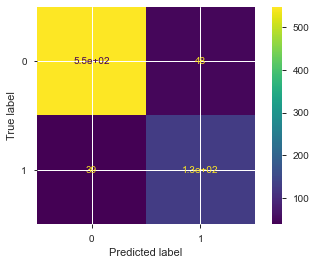

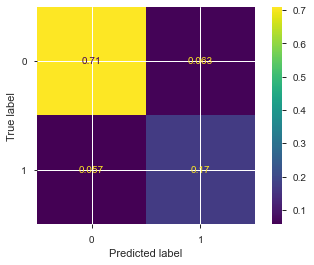

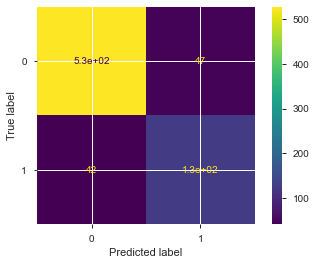

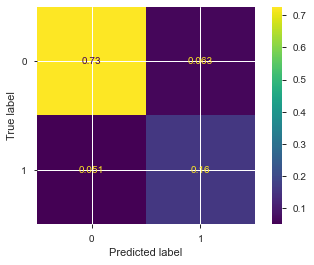

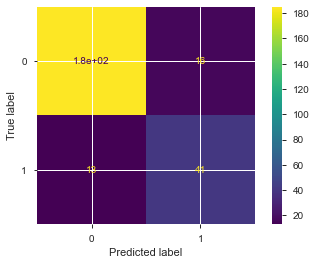

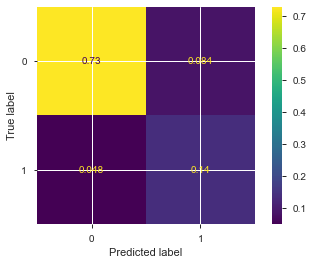

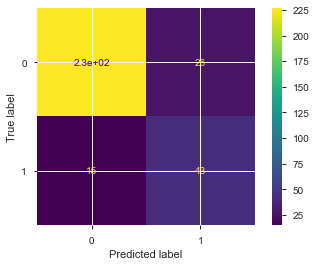

In [ ]:
colunas = ['NU_ANLS_OLEO', 'LOCO_analise', 'DT_COLETA', 'year_month',
           'ALUMINIO', 'FERRO', 'CROMO', 'CHUMBO', 'COBRE', 'ESTANHO', 'PRATA', 'SILICIO', 'SODIO', 'DIESEL', 
           'VISCOSIDADE', 'AGUA', 'TBN', 'FULIGEM', 'OXIDACAO', 'SULFATACAO', 'TARGET']

df = DF[colunas]
df["TARGET"] = df["TARGET"].replace({"NORMAL": 0, "MONITORAR": 1}) 

month_interest = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', 
                  '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
                  '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', 
                  '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', 
                  '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', 
                  '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']

for i in range(6, len(month_interest), 1):
    print('\n', '='*25, 'Training Period: from', month_interest[0], 'til', month_interest[i-1], '='*25)
    
    transactions_data_sub_train = df[df['year_month'].isin(month_interest[:i])]
    transactions_data_sub_eval = df[df['year_month'] == month_interest[i]] 
    print('Target Label size (Train):', transactions_data_sub_train['TARGET'].value_counts())
    print('Target Label size (Evaluation):', transactions_data_sub_eval['TARGET'].value_counts())
    
    y = transactions_data_sub_train["TARGET"]
    X = transactions_data_sub_train.drop(labels = ["TARGET", "NU_ANLS_OLEO", 
                                                   "LOCO_analise", "DT_COLETA", "year_month"], axis = 1)
  
    print(f"Num Columns before VarianceThresholding: {X.shape[1]}")
    var = VarianceThreshold(threshold = 0.001)
    var.fit(X)
    X_final = X[X.columns[var.get_support()]]
    print(f"Num Columns after VarianceThresholding: {X_final.shape[1]}")
      
    trainX, testX, trainy, testy = train_test_split(X_final, y, test_size = 0.3)
  
    print('Train set size:', round(100*(len(trainX)/len(v1_v2_dataset)), 2), '%')
    print('Test set size:', round(100*(len(testX)/len(v1_v2_dataset)), 2), '%')
    
    best_params = {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 15, 'n_estimators': 100}
    clf = RandomForestClassifier() 
    clf.set_params(**best_params)
    clf.fit(trainX, trainy)
    preds = clf.predict_proba(testX)
    res, impDf, clf_fitted = return_results(clf, trainX, trainy)
    print("Random Forest Classifier Results for the Customer-Based Splitting Method:")
    print(res.iloc[2:,:])
  
    print(classification_report(testy, clf.predict(testX)))
   
    final_df = pd.DataFrame()
    for j in np.arange(0, 1, 0.01):
        final_df = final_df.append(pd.DataFrame({"cutoff": j, 
                                                 "precision": precision_score(testy, np.where(preds[:,1] > j, 1, 0)), 
                                                 "recall": recall_score(testy, np.where(preds[:,1] > j, 1, 0)),
                                                 "f1": f1_score(testy, np.where(preds[:,1] > j, 1, 0))}, index = [0]))
  
    final_df.set_index("cutoff", inplace = True)
    final_df['error'] = abs(final_df['precision'] - final_df['recall'])
    cutoff_point = final_df[final_df['error'] == final_df['error'].min()].index[0]
    if cutoff_point > 0.9:
        cutoff_point = 0.5
    print('Cutoff Point: ', cutoff_point)
  
    eval_y = transactions_data_sub_eval['TARGET']
    eval_X = transactions_data_sub_eval[testX.columns]
  
    preds = clf.predict_proba(eval_X)
    preds = pd.DataFrame([1 if y >= cutoff_point else 0 for y in preds[:, 1]]) # cutoff_point
  
    print('-'*25, 'Evaluating Period:', month_interest[i], '-'*25)
    print(classification_report(eval_y, preds))
  
    print("Test Data:")
    print(eval_y.value_counts(normalize = True)*100)
    print(" "*50)
    print("Predicted Data Before:")
    print(preds[0].value_counts(normalize = True)*100)
  
    cm = confusion_matrix(eval_y, preds, normalize = 'all')
    ConfusionMatrixDisplay(cm, display_labels = clf.classes_).plot()
    cm = confusion_matrix(eval_y, preds)
    ConfusionMatrixDisplay(cm, display_labels = clf.classes_).plot()